# Pepsi Products detection with Detectron2
---



**Detectron2** is a framework for building state-of-the-art object detection and image segmentation models. It is developed by the Facebook Research team. Detectron2 is a complete rewrite of the first version.

The real power of **Detectron2** lies in the HUGE amount of pre-trained models available at the **Model Zoo**. But if you didn't find any already trained model for your specific task, we can easily train it on our own custom data. Fortunately, that’s super easy! We’ll see in this project how we can train our object detection model on **Pepsi, Coke and 7up products** custom dataset using **Detectron2**

This project is assigned as capstone project of **"Foundations of AI with Python**" course by **TEVTA** with the cooperation of **ABLETECH**.

Here, we will go through in following steps to complete our task:
> 1.   Detectron2 Installation
2.   Register COCO Dataset
3. Train model on Dataset
4. Make Prediction & Evaluation
5. Validate model on Test data.
6. Validate model on video







**1. Install Detectron2 and its Dependencies**

In [ ]:
# install dependencies:
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision

# install detectron2
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

**Link Colab to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Register COCO dataset**

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("BevaragesDataset_coco", {}, "/content/drive/My Drive/CapstoneProject_Beverages/Annotations/BeveragesAnnotation_Final_coco.json", "/content/drive/My Drive/CapstoneProject_Beverages/Training Images")


In [ ]:
from detectron2.data import MetadataCatalog, DatasetCatalog
pepsi_metadata = MetadataCatalog.get("BevaragesDataset_coco")
print(pepsi_metadata)

dataset_dicts = DatasetCatalog.get("BevaragesDataset_coco")
#print(dataset_dicts)

Metadata(evaluator_type='coco', image_root='/content/drive/My Drive/CapstoneProject_Beverages/Training Images', json_file='/content/drive/My Drive/CapstoneProject_Beverages/Annotations/BeveragesAnnotation_Final_coco.json', name='BevaragesDataset_coco')


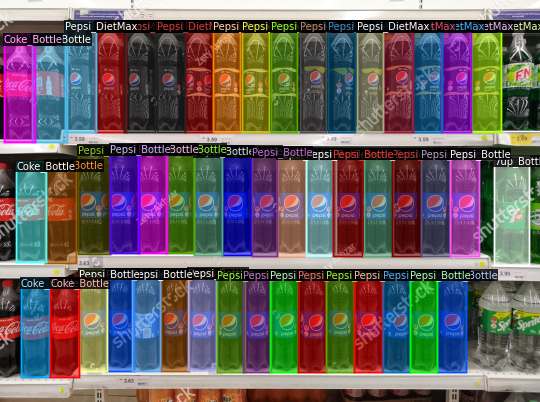

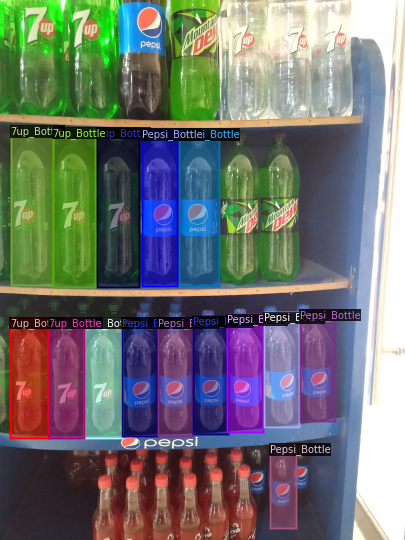

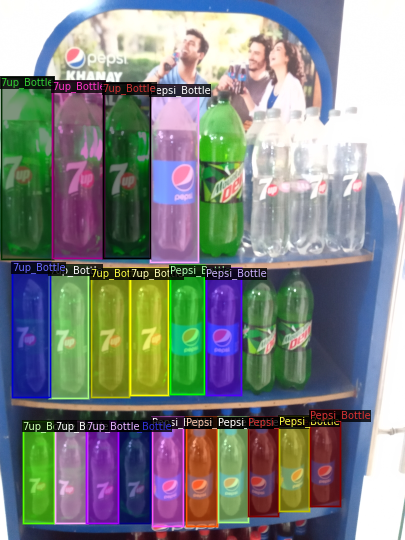

In [ ]:
import random
import cv2
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

for d in random.sample(dataset_dicts, 3):
  img = cv2.imread(d['file_name'])
  visualizer = Visualizer(img[:, :, ::-1], metadata=pepsi_metadata, scale=0.5)
  vis = visualizer.draw_dataset_dict(d)
  cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os

cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("BevaragesDataset_coco",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR (0.02 | 0.00025)
cfg.SOLVER.MAX_ITER = 5000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13

**3. Train the model**

Now, let's fine-tune a COCO-pretrained R50-FPN Mask R-CNN model on the Pepsi dataset. It takes ~40 to 60 minutes to train 5000 iterations on Colab's GPU with learning rate of 0.00025.

In [ ]:
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("BevaragesDataset_coco",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR (0.02 | 0.00025)
cfg.SOLVER.MAX_ITER = 5000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13

# savaing model to drive
cfg.OUTPUT_DIR = "/content/drive/My Drive/CapstoneProject_Beverages/Trained_Model"
cfg.OUTPUT_DIR
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[09/28 02:13:38 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:18, 9.63MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (14, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (14,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (52, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (52,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due 

[09/28 02:14:02 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.6/dist-packages/detectron2/structures/masks.py:331: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.6/dist-packages/detectron2/structures/masks.py:331: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.6/dist-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_

[09/28 02:14:23 d2.utils.events]:  eta: 1:08:32  iter: 19  total_loss: 4.087  loss_cls: 2.481  loss_box_reg: 0.792  loss_mask: 0.693  loss_rpn_cls: 0.054  loss_rpn_loc: 0.037  time: 0.9307  data_time: 0.5822  lr: 0.000005  max_mem: 2650M
[09/28 02:14:44 d2.utils.events]:  eta: 1:11:39  iter: 39  total_loss: 3.918  loss_cls: 2.390  loss_box_reg: 0.783  loss_mask: 0.692  loss_rpn_cls: 0.050  loss_rpn_loc: 0.046  time: 0.9982  data_time: 0.6597  lr: 0.000010  max_mem: 2760M
[09/28 02:15:01 d2.utils.events]:  eta: 1:09:12  iter: 59  total_loss: 3.708  loss_cls: 2.167  loss_box_reg: 0.789  loss_mask: 0.685  loss_rpn_cls: 0.037  loss_rpn_loc: 0.031  time: 0.9534  data_time: 0.4372  lr: 0.000015  max_mem: 2760M
[09/28 02:15:20 d2.utils.events]:  eta: 1:07:22  iter: 79  total_loss: 3.395  loss_cls: 1.857  loss_box_reg: 0.759  loss_mask: 0.672  loss_rpn_cls: 0.053  loss_rpn_loc: 0.038  time: 0.9488  data_time: 0.4150  lr: 0.000020  max_mem: 2760M
[09/28 02:15:32 d2.utils.events]:  eta: 1:00:57 

**4. Make a prediction**

Now, let's run inference with the trained model on the pepsi validation/test dataset. First, let's create a predictor using the model we just trained:

In [ ]:
from detectron2.engine import DefaultPredictor

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/drive/My Drive/CapstoneProject_Beverages/Trained_Model/model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("BevaragesDataset_coco", )
predictor = DefaultPredictor(cfg)

**visualize the prediction results.**

Now we randomly select samples to visualize the prediction results.

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=pepsi_metadata,
                   scale=0.8,
                   #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

**Performance Evaluation using AP**

We can also evaluate its performance using AP metric implemented in COCO API. In our case it gives an AP of ~85.65

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("BevaragesDataset_coco", cfg, False, output_dir="/content/drive/My Drive/CapstoneProject_Beverages/Trained_Model")
val_loader = build_detection_test_loader(cfg, "BevaragesDataset_coco")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[09/28 03:21:22 d2.data.datasets.coco]: Loaded 153 images in COCO format from /content/drive/My Drive/CapstoneProject_Beverages/Annotations/BeveragesAnnotation_Final_coco.json
[09/28 03:21:22 d2.data.common]: Serializing 153 elements to byte tensors and concatenating them all ...
[09/28 03:21:22 d2.data.common]: Serialized dataset takes 0.16 MiB
[09/28 03:21:22 d2.data.dataset_mapper]: Augmentations used in training: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/28 03:21:22 d2.evaluation.evaluator]: Start inference on 153 images
[09/28 03:21:25 d2.evaluation.evaluator]: Inference done 11/153. 0.1782 s / img. ETA=0:00:41
[09/28 03:21:30 d2.evaluation.evaluator]: Inference done 36/153. 0.1581 s / img. ETA=0:00:25
[09/28 03:21:35 d2.evaluation.evaluator]: Inference done 66/153. 0.1512 s / img. ETA=0:00:17
[09/28 03:21:40 d2.evaluation.evaluator]: Inference done 95/153. 0.1488 s / img. ETA=0:00:11
[09/28 03:21:45 d2.evaluation.evaluator]: Infe

**5. Validate Model on Test Data**

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob
os.makedirs('/content/drive/My Drive/CapstoneProject_Beverages/Visualized_Test_Images', exist_ok=True)

test_dataset_dicts = glob.glob('/content/drive/My Drive/CapstoneProject_Beverages/Test Images/*.jpg')

# for imageName in glob.glob('/content/drive/My Drive/CapstoneProject_Beverages/Test Images/*.jpg'):
for imageName in random.sample(test_dataset_dicts, 10):
    im = cv2.imread(imageName)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=pepsi_metadata,
                   scale=0.8
                   #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    name = imageName.replace('Test Images', 'Visualized_Test_Images')
    cv2.imwrite(name, v.get_image()[:, :, ::-1])
    cv2_imshow(v.get_image()[:, :, ::-1])

**6. Validate Model on Video**

To apply detectron training on a video, we need to process each frame of video. we will process video in following 3 steps:
1.   Split video in frame and process each frame on trained model for product detection and store each processed frame in a directry.
2.   Sort the processed frames.
3. Rearrange the frames into video with object detection result.

a) Process each frame of video

In [ ]:
VIDEO_DIR = '/content/drive/My Drive/CapstoneProject_Beverages'
VIDEO_SAVE_DIR = '/content/save_video'
os.makedirs(VIDEO_SAVE_DIR, exist_ok=True)

capture = cv2.VideoCapture(os.path.join(VIDEO_DIR, 'Pepsi_Demo.mp4'))
frame_count = 0
while True:
    ret, frame = capture.read()
    if not ret:
        break
    frame_count += 1
    results = predictor(frame)

    v = Visualizer(frame[:, :, ::-1],
                   metadata=pepsi_metadata,
                   scale=0.8
    )
    v = v.draw_instance_predictions(results["instances"].to("cpu"))

    name = '{0}.jpg'.format(frame_count)
    name = os.path.join(VIDEO_SAVE_DIR, name)
    cv2.imwrite(name, v.get_image()[:, :, ::-1])


b) Sort the processed frames

In [ ]:
# Get all image file paths to a list.
images = list(glob.iglob(os.path.join(VIDEO_SAVE_DIR, '*.jpg')))
# Sort the images by name index.
images = sorted(images, key=lambda x: float(os.path.split(x)[1][:-3]))

c) Reconvert frames into video

In [ ]:
def make_video(outvid, images=None, fps=30, size=None,
               is_color=True, format="FMP4"):
    from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
    fourcc = VideoWriter_fourcc(*format)
    vid = None
    for image in images:
        if not os.path.exists(image):
            raise FileNotFoundError(image)
        img = imread(image)
        if vid is None:
            if size is None:
                size = img.shape[1], img.shape[0]
            vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
        if size[0] != img.shape[1] and size[1] != img.shape[0]:
            img = resize(img, size)
        vid.write(img)
    vid.release()
    return vid


import glob
import os

# Directory of images to run detection on
OUTPUT_VIDEO_DIR = '/content/drive/My Drive/CapstoneProject_Beverages/Resulted_Video'
os.makedirs(OUTPUT_VIDEO_DIR, exist_ok=True)

OUTPUT_VIDEO_DIR = OUTPUT_VIDEO_DIR + '/'

images = list(glob.iglob(os.path.join(VIDEO_SAVE_DIR, '*.jpg')))
# Sort the images by integer index
images = sorted(images, key=lambda x: float(os.path.split(x)[1][:-3]))

outvid = os.path.join(OUTPUT_VIDEO_DIR, "output.mp4")
make_video(outvid, images, fps=30)

<VideoWriter 0x7f11a053a410>

**Download Output Video**

In [ ]:
from google.colab import files
files.download(OUTPUT_VIDEO_DIR + "output.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Get Predictions**

In [ ]:
import pandas as pd

test_data_dir= glob.glob('/content/drive/My Drive/CapstoneProject_Beverages/Test Images/*.jpg')
# test_data_dir= '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/*.jpg'
print(test_data_dir)
data=[]
for img in (test_data_dir)[:20]:
    im=cv2.imread(img)
    outputs=predictor(im)
    # get instances values.
    boxes = [i.cpu().detach().numpy().astype('int').tolist() for i in outputs["instances"].pred_boxes]
    classes=[i.cpu().detach().numpy().astype('int').tolist() for i in outputs["instances"].pred_classes]
    scores =[i.cpu().detach().numpy().astype('float32').tolist() for i in outputs["instances"].scores]
    height=outputs["instances"].image_size[0]
    width=outputs["instances"].image_size[1]
    name=img
    for i in range(len(boxes)):
      box = boxes[i]
      x1=box[0]
      y1=box[1]
      x2=box[2]
      y2=box[3]
      score=scores[i]
      class_id=classes[i]
      pred_class=pepsi_metadata.thing_classes[class_id]
      data.append({"Image":name,
                   "Height":height,
                   "Width":width,
                   "X1":x1,
                   "Y1":y1,
                   "X2":x2,
                   "Y2":y2,
                   "Category":pred_class,
                   "Confidence":score})


['/content/drive/My Drive/CapstoneProject_Beverages/Test Images/151.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/26.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/153.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/30.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/32.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/31.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/33.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/34.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/158.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/35.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/27.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/36.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Images/37.jpg', '/content/drive/My Drive/CapstoneProject_Beverages/Test Imag

**Save Predictions to CSV File**

In [ ]:
# importing library
import csv

# opening the csv file in 'w' mode

os.makedirs('/content/drive/My Drive/CapstoneProject_Beverages/Export_Predictions', exist_ok=True)

file = open('/content/drive/My Drive/CapstoneProject_Beverages/Export_Predictions/predictions.csv', 'w', newline ='')

with file:
    # identifying header
    header = ['Category', 'Confidence', 'Height', 'Image', 'Width', 'X1', 'X2', 'Y1', 'Y2']
    writer = csv.DictWriter(file, fieldnames = header)

    # writing data row-wise into the csv file
    writer.writeheader()

    for row in data:
      writer.writerow(row)

In [ ]:
# download csv file
from google.colab import files
files.download('/content/drive/My Drive/CapstoneProject_Beverages/Export_Predictions/predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>